# Installing Required Libraries.

In [ ]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.1 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21692 sha256=3cd1ff9faaa41a7ead87d15582829c3e3a6ae04219fa29f60145fc48d3b9a416
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=31edee6c2b8f97afa97b065bf85ed2292ead64d5f0c560c79d248cd9a23329b7
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [2]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import pipeline
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
import random
import seaborn as sns
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading datasets. Combining.
Not required to run everytime. One time run from next just load the data.

In [ ]:
from datasets import load_dataset

data = load_dataset("chillies/IELTS-writing-task-2-evaluation")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/44.5M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9833 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/491 [00:00<?, ? examples/s]

In [ ]:
train_df = pd.DataFrame(data['train'])
test_df = pd.DataFrame(data['test'])
combined_df = pd.concat([train_df, test_df], ignore_index=True)
df = combined_df

In [ ]:
def clean_band(band_value):
    cleaned_value = re.sub(r'[\r\n]+', '', str(band_value)).strip()  # Remove unwanted characters
    return cleaned_value

# Apply cleaning to 'band' column
df['band'] = df['band'].apply(clean_band)
df.dtypes

,0
prompt,object
essay,object
evaluation,object
band,object


In [ ]:
df

,prompt,essay,evaluation,band
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4
...,...,...,...,...
10319,"As well as making money, businesses also have ...",The role of companies is to produce all the go...,**Task Achievement:** 6\n\nThe essay effective...,6
10320,"As well as making money, businesses also have ...",Although earning money is one of the most impo...,**Task Achievement:**\n\n- The essay adequatel...,7.5
10321,"As well as making money, businesses also have ...",IIt is argued by many people that companies ha...,**Task Achievement: 4**\n\nThe essay addresses...,5
10322,"As well as making money, businesses also have ...","In this modern era , everyone needs money for ...",## Task Achievement:\n- The candidate has adeq...,4


In [ ]:
!pip install nltk
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from datasets import load_dataset

def summarize_text(text, sentence_count=5):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentence_count)
    return " ".join(str(sentence) for sentence in summary)

# Apply summarization
df['summary'] = df['essay'].apply(summarize_text)

/usr/local/lib/python3.10/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (18) is lower than number of sentences (48). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


In [ ]:
df.head(10)

,prompt,essay,evaluation,band,summary
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5,"Furthermore, recruiters also assess the applic..."
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0,Nowadays numerous huge firms allocate an inter...
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5,"But, some people think that interview is not a..."
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5,This is because in the interviews manager has ...
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4,Nowadays many companies conduct interviews bef...
5,Interviews form the basic selection criteria f...,Mostly when you find work in different compani...,## Task Achievement:\n- The candidate has part...,5.5,Mostly when you find work in different compani...
6,Interviews form the basic selection criteria f...,it is argued that there must be another method...,## Task Achievement:\n- The candidate has adeq...,5,it is argued that there must be another method...
7,Interviews form the basic selecting criteria f...,It is undeniable that most well-known organiza...,## Task Achievement:\n- The candidate has adeq...,4,It is undeniable that most well-known organiza...
8,Interviews form the basic selection criteria f...,"Sometimes, people argue that interview is not ...",**Task Achievement:** <4\n- The essay somewhat...,<4,I completely disagree with this opinion and th...
9,Interviews form the basic selecting criteria f...,"overall,interviews form the basic crteria ffor...",## Task Achievement:\n- The candidate has not ...,<4,"overall,interviews form the basic crteria ffor..."


In [ ]:
df.to_csv('FinalSummaries.csv')

In [ ]:
df['combined_e_text'] = df['prompt'] + " " + df['essay'] + " " + df['evaluation']
df['combined_s_text'] = df['prompt'] + " " + df['summary'] + " " + df['evaluation']

In [ ]:
df

,prompt,essay,evaluation,band,summary,combined_e_text,combined_s_text
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5,"Furthermore, recruiters also assess the applic...",Interviews form the basic criteria for most la...,Interviews form the basic criteria for most la...
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0,Nowadays numerous huge firms allocate an inter...,Interviews form the basic selecting criteria f...,Interviews form the basic selecting criteria f...
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5,"But, some people think that interview is not a...",Interview form the basic selection criteria fo...,Interview form the basic selection criteria fo...
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5,This is because in the interviews manager has ...,Interviews form the basic selection criteria f...,Interviews form the basic selection criteria f...
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4,Nowadays many companies conduct interviews bef...,Interviews from the basic selecting criteria f...,Interviews from the basic selecting criteria f...
...,...,...,...,...,...,...,...
10319,"As well as making money, businesses also have ...",The role of companies is to produce all the go...,**Task Achievement:** 6\n\nThe essay effective...,6,"However, many people support the idea that the...","As well as making money, businesses also have ...","As well as making money, businesses also have ..."
10320,"As well as making money, businesses also have ...",Although earning money is one of the most impo...,**Task Achievement:**\n\n- The essay adequatel...,7.5,Although earning money is one of the most impo...,"As well as making money, businesses also have ...","As well as making money, businesses also have ..."
10321,"As well as making money, businesses also have ...",IIt is argued by many people that companies ha...,**Task Achievement: 4**\n\nThe essay addresses...,5,IIt is argued by many people that companies ha...,"As well as making money, businesses also have ...","As well as making money, businesses also have ..."
10322,"As well as making money, businesses also have ...","In this modern era , everyone needs money for ...",## Task Achievement:\n- The candidate has adeq...,4,"In this modern era , everyone needs money for ...","As well as making money, businesses also have ...","As well as making money, businesses also have ..."


In [ ]:
def clean_band(band_value):
    cleaned_value = re.sub(r'[\r\n]+', '', str(band_value)).strip()  # Remove unwanted characters
    return cleaned_value

# Apply cleaning to 'band' column
df['band'] = df['band'].apply(clean_band)
df.dtypes

,0
prompt,object
essay,object
evaluation,object
band,object
summary,object
combined_e_text,object
combined_s_text,object


In [ ]:
df = df[df['band'] != 'None']

# Step 2: Remove rows where the 'band' column has non-numeric values (like paragraphs or strings)
# This will keep only the rows where 'band' is numeric.
df = df[pd.to_numeric(df['band'], errors='coerce').notnull()]

# Step 3: Convert the 'band' column to a numeric type for further processing
df['band'] = df['band'].astype(float)

       essay_length  summary_length         band
count   9712.000000     9712.000000  9712.000000
mean     299.878295      117.040157     6.292473
std       48.939820       42.294263     1.267894
min        1.000000        0.000000     4.000000
25%      267.000000       91.000000     5.500000
50%      292.000000      108.000000     6.500000
75%      324.000000      129.000000     7.500000
max     1557.000000      472.000000     9.000000


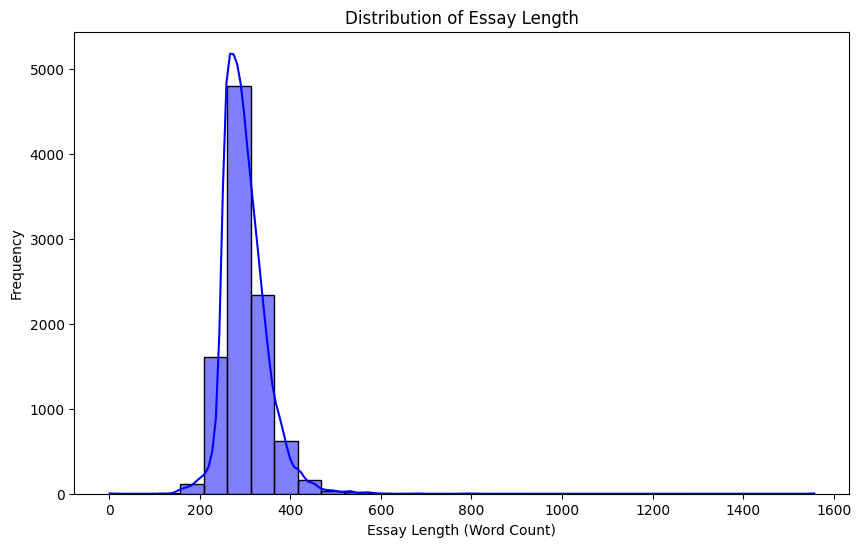

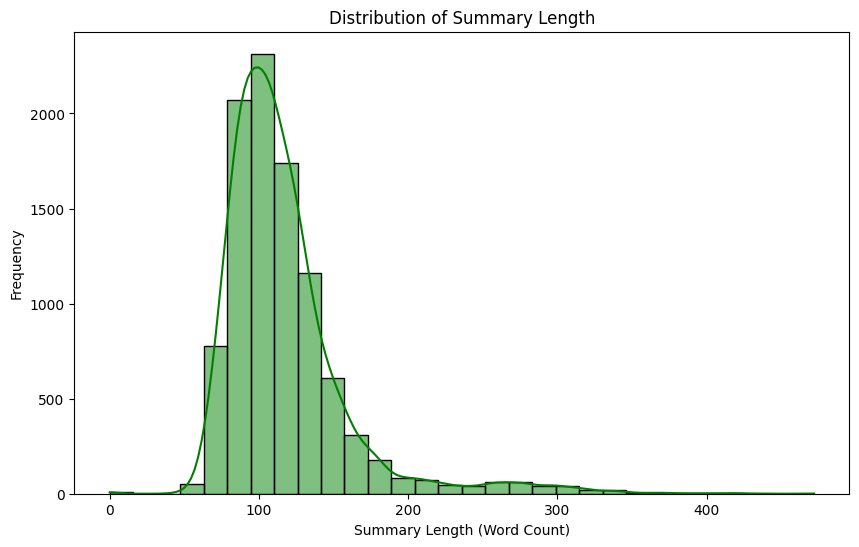

<ipython-input-42-e09ca49ab597>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='band', data=df, palette='Set2')


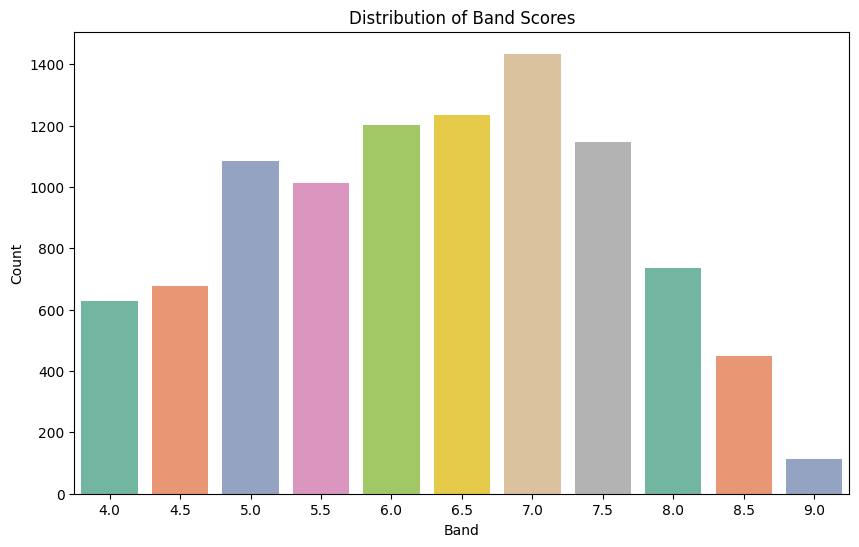

In [ ]:
df['essay_length'] = df['essay'].apply(lambda x: len(str(x).split()))
df['summary_length'] = df['summary'].apply(lambda x: len(str(x).split()))

# 2. Descriptive statistics for essay length, summary length, and bands
print(df[['essay_length', 'summary_length', 'band']].describe())

# 3. Plot distribution of essay length
plt.figure(figsize=(10, 6))
sns.histplot(df['essay_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Essay Length')
plt.xlabel('Essay Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

# 4. Plot distribution of summary length
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_length'], kde=True, bins=30, color='green')
plt.title('Distribution of Summary Length')
plt.xlabel('Summary Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

# 5. Plot distribution of band scores
plt.figure(figsize=(10, 6))
sns.countplot(x='band', data=df, palette='Set2')
plt.title('Distribution of Band Scores')
plt.xlabel('Band')
plt.ylabel('Count')
plt.show()


In [5]:
df = pd.read_csv('/content/FinalDataWithPreds.csv')

<ipython-input-5-879eefff077a>:1: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/FinalDataWithPreds.csv')


# Essays Model.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


243/243 - 11s - 46ms/step - custom_rmse: 4.2227 - loss: 23.8947 - mae: 4.2233 - val_custom_rmse: 1.4006 - val_loss: 3.4819 - val_mae: 1.1689
Epoch 2/100
243/243 - 1s - 6ms/step - custom_rmse: 1.7218 - loss: 4.4741 - mae: 1.4008 - val_custom_rmse: 1.3521 - val_loss: 3.2320 - val_mae: 1.1320
Epoch 3/100
243/243 - 1s - 5ms/step - custom_rmse: 1.7011 - loss: 4.2747 - mae: 1.3838 - val_custom_rmse: 1.3856 - val_loss: 3.2169 - val_mae: 1.1650
Epoch 4/100
243/243 - 1s - 5ms/step - custom_rmse: 1.6586 - loss: 3.9969 - mae: 1.3470 - val_custom_rmse: 1.3516 - val_loss: 2.9903 - val_mae: 1.1295
Epoch 5/100
243/243 - 1s - 5ms/step - custom_rmse: 1.6421 - loss: 3.8449 - mae: 1.3362 - val_custom_rmse: 1.3503 - val_loss: 2.8929 - val_mae: 1.1288
Epoch 6/100
243/243 - 1s - 5ms/step - custom_rmse: 1.6004 - loss: 3.6186 - mae: 1.3061 - val_custom_rmse: 1.3412 - val_loss: 2.7888 - val_mae: 1.1223
Epoch 7/100
243/243 - 1s - 3ms/step - custom_rmse: 1.5827 - loss: 3.4799 - mae: 1.2934 - val_custom_rmse: 1.3

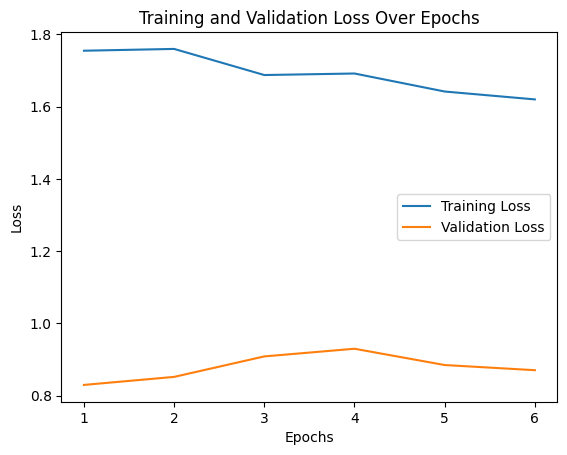

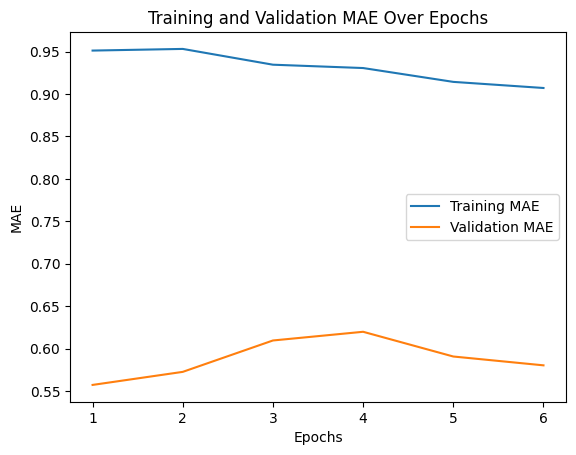

Average Training Loss: 1.0865321278572082, Average Validation Loss: 1.2044017434120178
Average Training MAE: 0.6949957966804504, Average Validation MAE: 0.7354223012924195
Average Training RMSE: 0.8590574145317078, Average Validation RMSE: 0.9067814588546753


In [ ]:
# Step 1: Define the list of allowed band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Step 2: Create a TensorFlow function to round the predicted values to the nearest allowed band
def round_to_nearest_band_tensorflow(pred):
    pred_expanded = tf.expand_dims(pred, axis=-1)
    allowed_bands_tensor = tf.constant(allowed_bands, dtype=tf.float32)
    distances = tf.abs(allowed_bands_tensor - pred_expanded)
    nearest_band = tf.gather(allowed_bands_tensor, tf.argmin(distances, axis=-1))
    return nearest_band

# Step 3: Modify RMSE metric to include rounding to the nearest band
def custom_rmse(y_true, y_pred):
    # Round predictions to the nearest band using TensorFlow operations
    y_pred_rounded = round_to_nearest_band_tensorflow(y_pred)
    # Compute RMSE between true and rounded predicted values
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred_rounded)))

bands = df['band']

df['combined_e_text'] = df['combined_e_text'].astype(str)

# Then proceed with the tokenization
essays = df['combined_e_text']
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(essays)

X = tokenizer.texts_to_sequences(essays)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=200, padding='post', truncating='post')

y = bands

# Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Step 4: Adjust learning rate in the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Step 5: Define the neural network model with L2 regularization
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=200),
    tf.keras.layers.SpatialDropout1D(0.3),  # Increased dropout
    tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),  # Added L2 regularization
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),  # Increased dropout
    tf.keras.layers.Dense(1, activation='linear')  # Regression output for band score prediction
])

# Step 6: Compile the model with the custom RMSE metric
model1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', custom_rmse])

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Implementing K-Fold Cross Validation
kf = KFold(n_splits=5)

# Initialize lists to store metrics from each fold
train_losses = []
val_losses = []
train_mae = []
val_mae = []
train_rmse = []
val_rmse = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    history = model1.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=2
    )

    # Evaluate the model on the validation data
    val_loss, val_mae_score, val_rmse_score = model1.evaluate(X_val, y_val)
    train_loss, train_mae_score, train_rmse_score = model1.evaluate(X_train, y_train)

    # Store the metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_mae.append(train_mae_score)
    val_mae.append(val_mae_score)
    train_rmse.append(train_rmse_score)
    val_rmse.append(val_rmse_score)

# Step 7: Visualize loss, MAE, and RMSE for each fold
epochs = range(1, len(history.history['loss']) + 1)

# Plot loss
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAE
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Step 8: Average the results from all folds
print(f"Average Training Loss: {np.mean(train_losses)}, Average Validation Loss: {np.mean(val_losses)}")
print(f"Average Training MAE: {np.mean(train_mae)}, Average Validation MAE: {np.mean(val_mae)}")
print(f"Average Training RMSE: {np.mean(train_rmse)}, Average Validation RMSE: {np.mean(val_rmse)}")


## Summaries Model.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


243/243 - 7s - 30ms/step - custom_rmse: 3.8415 - loss: 20.7652 - mae: 3.7818 - val_custom_rmse: 1.3733 - val_loss: 3.3698 - val_mae: 1.1133
Epoch 2/100
243/243 - 6s - 23ms/step - custom_rmse: 1.7679 - loss: 4.6166 - mae: 1.4434 - val_custom_rmse: 1.3098 - val_loss: 3.1058 - val_mae: 1.0838
Epoch 3/100
243/243 - 1s - 3ms/step - custom_rmse: 1.6691 - loss: 4.1434 - mae: 1.3594 - val_custom_rmse: 1.2891 - val_loss: 2.9254 - val_mae: 1.0679
Epoch 4/100
243/243 - 1s - 3ms/step - custom_rmse: 1.6222 - loss: 3.8783 - mae: 1.3294 - val_custom_rmse: 1.2751 - val_loss: 2.7890 - val_mae: 1.0603
Epoch 5/100
243/243 - 1s - 6ms/step - custom_rmse: 1.5883 - loss: 3.6628 - mae: 1.2911 - val_custom_rmse: 1.2427 - val_loss: 2.6209 - val_mae: 1.0316
Epoch 6/100
243/243 - 1s - 5ms/step - custom_rmse: 1.5723 - loss: 3.5239 - mae: 1.2799 - val_custom_rmse: 1.2271 - val_loss: 2.5015 - val_mae: 1.0205
Epoch 7/100
243/243 - 1s - 3ms/step - custom_rmse: 1.5348 - loss: 3.3339 - mae: 1.2414 - val_custom_rmse: 1.2

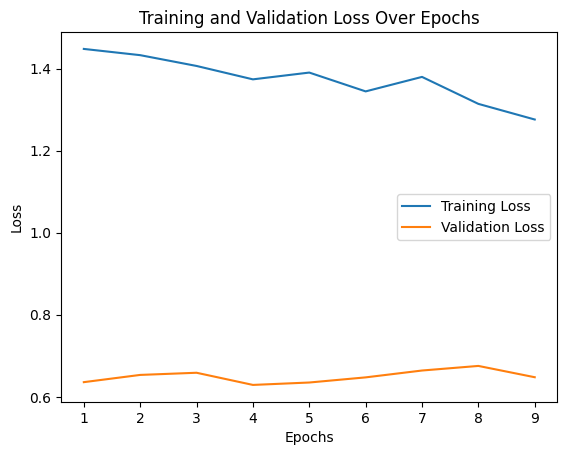

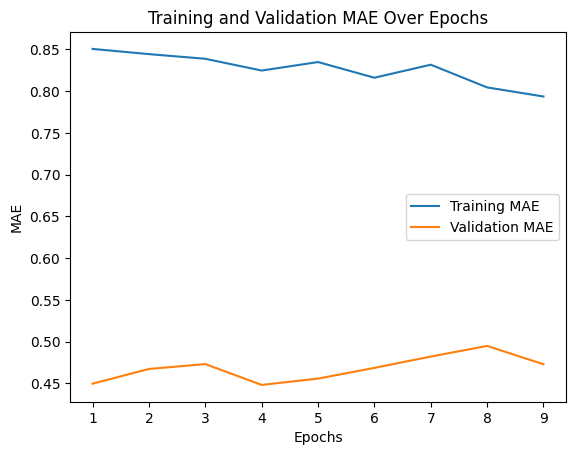

Average Training Loss: 0.7947539687156677, Average Validation Loss: 0.8748117089271545
Average Training MAE: 0.5312164068222046, Average Validation MAE: 0.5672438383102417
Average Training RMSE: 0.6958577275276184, Average Validation RMSE: 0.7451801180839539


In [ ]:
# Step 1: Define the list of allowed band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Step 2: Create a TensorFlow function to round the predicted values to the nearest allowed band
def round_to_nearest_band_tensorflow(pred):
    pred_expanded = tf.expand_dims(pred, axis=-1)
    allowed_bands_tensor = tf.constant(allowed_bands, dtype=tf.float32)
    distances = tf.abs(allowed_bands_tensor - pred_expanded)
    nearest_band = tf.gather(allowed_bands_tensor, tf.argmin(distances, axis=-1))
    return nearest_band

# Step 3: Modify RMSE metric to include rounding to the nearest band
def custom_rmse(y_true, y_pred):
    # Round predictions to the nearest band using TensorFlow operations
    y_pred_rounded = round_to_nearest_band_tensorflow(y_pred)
    # Compute RMSE between true and rounded predicted values
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred_rounded)))

bands = df['band']

df['combined_s_text'] = df['combined_s_text'].astype(str)

# Then proceed with the tokenization
essays = df['combined_s_text']
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(essays)

X = tokenizer.texts_to_sequences(essays)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=200, padding='post', truncating='post')

y = bands

# Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Step 4: Adjust learning rate in the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Step 5: Define the neural network model with L2 regularization
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=200),
    tf.keras.layers.SpatialDropout1D(0.3),  # Increased dropout
    tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),  # Added L2 regularization
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),  # Increased dropout
    tf.keras.layers.Dense(1, activation='linear')  # Regression output for band score prediction
])

# Step 6: Compile the model with the custom RMSE metric
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', custom_rmse])

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Implementing K-Fold Cross Validation
kf = KFold(n_splits=5)

# Initialize lists to store metrics from each fold
train_losses = []
val_losses = []
train_mae = []
val_mae = []
train_rmse = []
val_rmse = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    history = model2.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=2
    )

    # Evaluate the model on the validation data
    val_loss, val_mae_score, val_rmse_score = model2.evaluate(X_val, y_val)
    train_loss, train_mae_score, train_rmse_score = model2.evaluate(X_train, y_train)

    # Store the metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_mae.append(train_mae_score)
    val_mae.append(val_mae_score)
    train_rmse.append(train_rmse_score)
    val_rmse.append(val_rmse_score)

# Step 7: Visualize loss, MAE, and RMSE for each fold
epochs = range(1, len(history.history['loss']) + 1)

# Plot loss
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAE
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Step 8: Average the results from all folds
print(f"Average Training Loss: {np.mean(train_losses)}, Average Validation Loss: {np.mean(val_losses)}")
print(f"Average Training MAE: {np.mean(train_mae)}, Average Validation MAE: {np.mean(val_mae)}")
print(f"Average Training RMSE: {np.mean(train_rmse)}, Average Validation RMSE: {np.mean(val_rmse)}")


In [ ]:
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Step 1: Make predictions for the entire dataset
y_pred_raw = model1.predict(X)  # X represents the tokenized summaries/essays for the whole dataset

# Step 2: Convert predicted values to the nearest band
y_pred = np.array([round_to_nearest_band(pred[0]) for pred in y_pred_raw])

# Step 3: Add the predicted values as a new column to the original DataFrame
df['essay_pred'] = y_pred

# Display the updated DataFrame
print(df[['essay', 'essay_pred']].head())  # Display the first few rows with summaries and their predicted bands


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                                               essay  essay_pred
0  It is believed by some experts that the tradit...         6.0
1  Nowadays numerous huge firms allocate an inter...         6.0
2  The interview section is the most vital part o...         6.0
3  It is argued that the best method to recruit e...         6.5
4  Nowadays many companies conduct interviews bef...         6.0


In [ ]:
df

,prompt,essay,evaluation,band,summary,combined_e_text,combined_s_text,essay_pred,summary_pred
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5,"Furthermore, recruiters also assess the applic...",Interviews form the basic criteria for most la...,Interviews form the basic criteria for most la...,6.0,8.0
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0,Nowadays numerous huge firms allocate an inter...,Interviews form the basic selecting criteria f...,Interviews form the basic selecting criteria f...,6.0,5.0
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5,"But, some people think that interview is not a...",Interview form the basic selection criteria fo...,Interview form the basic selection criteria fo...,6.0,6.0
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5,This is because in the interviews manager has ...,Interviews form the basic selection criteria f...,Interviews form the basic selection criteria f...,6.5,5.5
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4.0,Nowadays many companies conduct interviews bef...,Interviews from the basic selecting criteria f...,Interviews from the basic selecting criteria f...,6.0,4.0
...,...,...,...,...,...,...,...,...,...
10319,"As well as making money, businesses also have ...",The role of companies is to produce all the go...,**Task Achievement:** 6\n\nThe essay effective...,6.0,"However, many people support the idea that the...","As well as making money, businesses also have ...","As well as making money, businesses also have ...",5.5,6.0
10320,"As well as making money, businesses also have ...",Although earning money is one of the most impo...,**Task Achievement:**\n\n- The essay adequatel...,7.5,Although earning money is one of the most impo...,"As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,7.0
10321,"As well as making money, businesses also have ...",IIt is argued by many people that companies ha...,**Task Achievement: 4**\n\nThe essay addresses...,5.0,IIt is argued by many people that companies ha...,"As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,5.0
10322,"As well as making money, businesses also have ...","In this modern era , everyone needs money for ...",## Task Achievement:\n- The candidate has adeq...,4.0,"In this modern era , everyone needs money for ...","As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,4.0


In [ ]:
df.to_csv('FinalDataWithPreds.csv')

In [ ]:
# Step 1: Define the list of allowed band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Step 2: Create a Python function to round the predicted values to the nearest allowed band
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Make predictions for the entire dataset
y_pred_raw = model2.predict(X)  # X represents the tokenized summaries/essays for the whole dataset

# Convert predicted values to the nearest band
y_pred = np.array([round_to_nearest_band(pred[0]) for pred in y_pred_raw])

# Add the predicted values as a new column to the original DataFrame
df['summary_pred'] = y_pred

# Display the updated DataFrame
print(df[['summary', 'summary_pred']].head())  # Display the first few rows with summaries and their predicted bands


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                                             summary  summary_pred
0  Furthermore, recruiters also assess the applic...           8.0
1  Nowadays numerous huge firms allocate an inter...           5.0
2  But, some people think that interview is not a...           6.0
3  This is because in the interviews manager has ...           5.5
4  Nowadays many companies conduct interviews bef...           4.0


In [ ]:
df

,prompt,essay,evaluation,band,summary,combined_e_text,combined_s_text,essay_pred,summary_pred
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5,"Furthermore, recruiters also assess the applic...",Interviews form the basic criteria for most la...,Interviews form the basic criteria for most la...,6.0,8.0
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0,Nowadays numerous huge firms allocate an inter...,Interviews form the basic selecting criteria f...,Interviews form the basic selecting criteria f...,6.0,5.0
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5,"But, some people think that interview is not a...",Interview form the basic selection criteria fo...,Interview form the basic selection criteria fo...,6.0,6.0
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5,This is because in the interviews manager has ...,Interviews form the basic selection criteria f...,Interviews form the basic selection criteria f...,6.5,5.5
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4.0,Nowadays many companies conduct interviews bef...,Interviews from the basic selecting criteria f...,Interviews from the basic selecting criteria f...,6.0,4.0
...,...,...,...,...,...,...,...,...,...
10319,"As well as making money, businesses also have ...",The role of companies is to produce all the go...,**Task Achievement:** 6\n\nThe essay effective...,6.0,"However, many people support the idea that the...","As well as making money, businesses also have ...","As well as making money, businesses also have ...",5.5,6.0
10320,"As well as making money, businesses also have ...",Although earning money is one of the most impo...,**Task Achievement:**\n\n- The essay adequatel...,7.5,Although earning money is one of the most impo...,"As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,7.0
10321,"As well as making money, businesses also have ...",IIt is argued by many people that companies ha...,**Task Achievement: 4**\n\nThe essay addresses...,5.0,IIt is argued by many people that companies ha...,"As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,5.0
10322,"As well as making money, businesses also have ...","In this modern era , everyone needs money for ...",## Task Achievement:\n- The candidate has adeq...,4.0,"In this modern era , everyone needs money for ...","As well as making money, businesses also have ...","As well as making money, businesses also have ...",6.0,4.0


# Evaluation

In [ ]:
final_loss, final_mae, final_rmse = model1.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_loss}, Final Test MAE: {final_mae}, Final Test Rmse: {final_rmse}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_rmse: 1.3174 - loss: 2.0672 - mae: 1.1006
Final Test Loss: 2.1249923706054688, Final Test MAE: 1.1196223497390747, Final Test Rmse: 1.3397856950759888


In [ ]:
final_loss, final_mae, final_rmse = model2.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_loss}, Final Test MAE: {final_mae}, Final Test Rmse: {final_rmse}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - custom_rmse: 0.6361 - loss: 0.6682 - mae: 0.4758
Final Test Loss: 0.6875264644622803, Final Test MAE: 0.4903604984283447, Final Test Rmse: 0.6516510248184204


In [ ]:
y_pred_raw = model2.predict(X_test)

# Convert predicted values to the nearest band
y_pred = np.array([round_to_nearest_band(pred[0]) for pred in y_pred_raw])

# Create a DataFrame to compare actual and predicted bands
df_results = pd.DataFrame({
    'Actual Band': y_test,
    'Predicted Band': y_pred
})

# Display the comparison DataFrame
print(df_results.sample(5))


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
      Actual Band  Predicted Band
3202          5.0             5.0
449           6.5             6.5
6599          8.0             7.0
9272          5.0             5.0
4531          7.5             7.0


In [ ]:
model1.save('ModelEssays.h5')
model2.save('ModelSummaries.h5')

# Connecting to LLAMA

In [7]:
!pip install nltk
!pip install requests
!pip install groq==0.9.0
!pip install langchain-groq==0.1.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


# Model without relevant scores

In [ ]:
import random
import pandas as pd
import tensorflow as tf
from langchain_groq import ChatGroq
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Groq LLAMA model for easy question generation
llm = ChatGroq(
    temperature=0,
    groq_api_key='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',  # Replace with your Groq API key
    model_name="llama-3.1-70b-versatile"
)

# Load the IELTS dataset from Hugging Face or your dataset
dfs = df

# Easy prompt (unevaluated)
easy_prompt = "The sky is ____. (Please fill in the blank with **one word**.)"

# Dataset question (evaluated)
dataset_question = dfs['prompt'].sample(1).iloc[0]  # Randomly sample 1 prompt from the dataset

# Function to generate a new easy question using LLM
def generate_dynamic_prompt(base_prompt):
    response = llm.invoke(f"Based on this example prompt: '{base_prompt}', create a new and unique question.")
    return response.content.strip()

# Function to collect responses
responses = []

def ask_questions():
    # Generate the easy question (unevaluated)
    dynamic_prompt = generate_dynamic_prompt(easy_prompt)
    print(f"Prompt (Not Evaluated): {dynamic_prompt}")
    user_response = input(f"Your response: ")
    responses.append(('easy', dynamic_prompt, user_response))

    # Add instruction beside the dataset question
    question_with_instruction = f"{dataset_question} (Answer in 100-150 words)"

    # Ask the dataset-based question (evaluated)
    print(f"Prompt: {question_with_instruction}")
    user_response = input(f"Your response: ")
    responses.append(('dataset', question_with_instruction, user_response))

ask_questions()

# Tokenizer for the pre-trained model
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Assume that `tokenizer` was fit using your existing training data
dfs['essay'] = dfs['essay'].fillna('')  # Ensure no None values exist in 'essay'
tokenizer.fit_on_texts(dfs['essay'])

# Tokenize responses (no summarization)
def tokenize_responses(responses, tokenizer):
    tokenized_responses = []
    for difficulty, prompt, response in responses:
        if difficulty != 'easy':  # Only evaluate dataset-based responses
            tokenized = tokenizer.texts_to_sequences([response])
            padded = pad_sequences(tokenized, maxlen=200, padding='post', truncating='post')
            tokenized_responses.append(padded)
    return tokenized_responses

tokenized_responses = tokenize_responses(responses, tokenizer)

# Load all 4 pre-trained models (assumed to be already trained for IELTS band score prediction)
model_paths = [
    'ModelEssays.h5',
    'ModelSummaries.h5'
]

# Load each model
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# List of allowed IELTS band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Function to round predicted values to the nearest valid band
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Use the models to predict band scores for tokenized responses and round to the nearest valid band
def predict_band_scores(models, tokenized_responses):
    all_model_scores = []
    for i, model in enumerate(models):
        predicted_scores = []
        for j, response in enumerate(tokenized_responses):
            pred = model.predict(response)
            # Round the prediction to the nearest band
            rounded_pred = round_to_nearest_band(pred[0][0])
            predicted_scores.append(rounded_pred)
        all_model_scores.append(predicted_scores)
    return all_model_scores

# Predict band scores for dataset-based responses
predicted_band_scores_all_models = predict_band_scores(models, tokenized_responses)

# Display predicted band scores for each model
for i, scores in enumerate(predicted_band_scores_all_models):
    for j, score in enumerate(scores):
        print(f"Model {i+1} - Response {j+1} (Dataset Question) predicted band score: {score}")


Prompt (Not Evaluated): The ocean is ____. (Please fill in the blank with **one word**.)
Your response: blue
Prompt: Some people say that playing computer games is bad for children in every aspect. Others say that playing computer games can have positive effects on the way children develop. Discuss both views and give your opinion. (Answer in 100-150 words)
Your response: Some people believe that pursuing higher education at a university or college is the best path to a successful career. They argue that obtaining a degree provides specialized knowledge, improves critical thinking skills, and opens doors to better job opportunities. Many industries require formal qualifications, and university education can give students a competitive edge in the job market.  On the other hand, others believe that entering the workforce right after school is more beneficial. They argue that gaining practical experience and on-the-job skills early can be just as valuable as formal education. Starting a 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Model 1 - Response 1 (Dataset Question) predicted band score: 5.5
Model 2 - Response 1 (Dataset Question) predicted band score: 6.5


# Model getting relevant scores without penality using SBERT.

In [ ]:
import random
import pandas as pd
import tensorflow as tf
from langchain_groq import ChatGroq
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the Groq LLAMA model for easy question generation
llm = ChatGroq(
    temperature=0,
    groq_api_key='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',  # Replace with your Groq API key
    model_name="llama-3.1-70b-versatile"
)

# Load the IELTS dataset from Hugging Face or your dataset
dfs = df

# Easy prompt (unevaluated)
easy_prompt = "The sky is ____. (Please fill in the blank with **one word**.)"

# Dataset question (evaluated)
dataset_question = dfs['prompt'].sample(1).iloc[0]  # Randomly sample 1 prompt from the dataset

# Function to generate a new easy question using LLM
def generate_dynamic_prompt(base_prompt):
    response = llm.invoke(f"Based on this example prompt: '{base_prompt}', create a new and unique question.")
    return response.content.strip()

# Function to collect responses
responses = []

def ask_questions():
    # Generate the easy question (unevaluated)
    dynamic_prompt = generate_dynamic_prompt(easy_prompt)
    print(f"Prompt (Not Evaluated): {dynamic_prompt}")
    user_response = input(f"Your response: ")
    responses.append(('easy', dynamic_prompt, user_response))

    # Add instruction beside the dataset question
    question_with_instruction = f"{dataset_question} (Answer in 100-150 words)"

    # Ask the dataset-based question (evaluated)
    print(f"Prompt: {question_with_instruction}")
    user_response = input(f"Your response: ")
    responses.append(('dataset', question_with_instruction, user_response))

ask_questions()

# Tokenizer for the pre-trained model
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Assume that `tokenizer` was fit using your existing training data
dfs['essay'] = dfs['essay'].fillna('')  # Ensure no None values exist in 'essay'
tokenizer.fit_on_texts(dfs['essay'])

# Tokenize responses (no summarization)
def tokenize_responses(responses, tokenizer):
    tokenized_responses = []
    for difficulty, prompt, response in responses:
        if difficulty != 'easy':  # Only evaluate dataset-based responses
            tokenized = tokenizer.texts_to_sequences([response])
            padded = pad_sequences(tokenized, maxlen=200, padding='post', truncating='post')
            tokenized_responses.append(padded)
    return tokenized_responses

tokenized_responses = tokenize_responses(responses, tokenizer)

# Load all 4 pre-trained models (assumed to be already trained for IELTS band score prediction)
model_paths = [
    'ModelEssays.h5',
    'ModelSummaries.h5'
]

# Load each model
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# List of allowed IELTS band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Function to round predicted values to the nearest valid band
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Use the models to predict band scores for tokenized responses and round to the nearest valid band
def predict_band_scores(models, tokenized_responses):
    all_model_scores = []
    for i, model in enumerate(models):
        predicted_scores = []
        for j, response in enumerate(tokenized_responses):
            pred = model.predict(response)
            # Round the prediction to the nearest band
            rounded_pred = round_to_nearest_band(pred[0][0])
            predicted_scores.append(rounded_pred)
        all_model_scores.append(predicted_scores)
    return all_model_scores

# Predict band scores for dataset-based responses
predicted_band_scores_all_models = predict_band_scores(models, tokenized_responses)

# Display predicted band scores for each model
for i, scores in enumerate(predicted_band_scores_all_models):
    for j, score in enumerate(scores):
        print(f"Model {i+1} - Response {j+1} (Dataset Question) predicted band score: {score}")

# ------- ADDING RELEVANCY SCORING -------- #
# Load the Sentence-BERT model for relevance scoring
relevancy_model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
relevancy_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Function to compute cosine similarity between question and response embeddings
def compute_relevancy(question, response):
    # Tokenize and encode both the question and response
    question_emb = relevancy_model(**relevancy_tokenizer(question, return_tensors='pt'))[0].mean(1)
    response_emb = relevancy_model(**relevancy_tokenizer(response, return_tensors='pt'))[0].mean(1)

    # Compute cosine similarity
    relevance_score = cosine_similarity(question_emb.detach().numpy(), response_emb.detach().numpy())[0][0]
    return relevance_score

# Compute and print relevancy scores for the dataset question responses
for i, (difficulty, question, response) in enumerate(responses):
    if difficulty != 'easy':
        relevancy_score = compute_relevancy(question, response)
        print(f"Response {i+1} - Relevancy Score: {relevancy_score:.2f}")


Prompt (Not Evaluated): The ocean is ____. (Please fill in the blank with **one word**.)
Your response: blue
Prompt: Some people believe that time spent on television, video and computer games can be valuable for children. Others believe this has negative effects on a child. Discuss both views and give your own opinion. (Answer in 100-150 words)
Your response: Some people believe that pursuing higher education at a university or college is the best path to a successful career. They argue that obtaining a degree provides specialized knowledge, improves critical thinking skills, and opens doors to better job opportunities. Many industries require formal qualifications, and university education can give students a competitive edge in the job market.  On the other hand, others believe that entering the workforce right after school is more beneficial. They argue that gaining practical experience and on-the-job skills early can be just as valuable as formal education. Starting a career soone

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Model 1 - Response 1 (Dataset Question) predicted band score: 5.5
Model 2 - Response 1 (Dataset Question) predicted band score: 6.5


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Response 2 - Relevancy Score: 0.29


# Model with relevant scores applying penality using SBERT.

In [ ]:
import random
import pandas as pd
import tensorflow as tf
from langchain_groq import ChatGroq
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the Groq LLAMA model for easy question generation
llm = ChatGroq(
    temperature=0,
    groq_api_key='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',  # Replace with your Groq API key
    model_name="llama-3.1-70b-versatile"
)

# Load the IELTS dataset from Hugging Face or your dataset
dfs = df

# Easy prompt (unevaluated)
easy_prompt = "The sky is ____. (Please fill in the blank with **one word**.)"

# Dataset question (evaluated)
dataset_question = dfs['prompt'].sample(1).iloc[0]  # Randomly sample 1 prompt from the dataset

# Function to generate a new easy question using LLM
def generate_dynamic_prompt(base_prompt):
    response = llm.invoke(f"Based on this example prompt: '{base_prompt}', create a new and unique question.")
    return response.content.strip()

# Function to collect responses
responses = []

def ask_questions():
    # Generate the easy question (unevaluated)
    dynamic_prompt = generate_dynamic_prompt(easy_prompt)
    print(f"Prompt (Not Evaluated): {dynamic_prompt}")
    user_response = input(f"Your response: ")
    responses.append(('easy', dynamic_prompt, user_response))

    # Add instruction beside the dataset question
    question_with_instruction = f"{dataset_question} (Answer in 100-150 words)"

    # Ask the dataset-based question (evaluated)
    print(f"Prompt: {question_with_instruction}")
    user_response = input(f"Your response: ")
    responses.append(('dataset', question_with_instruction, user_response))

ask_questions()

# Tokenizer for the pre-trained model
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Assume that `tokenizer` was fit using your existing training data
dfs['essay'] = dfs['essay'].fillna('')  # Ensure no None values exist in 'essay'
tokenizer.fit_on_texts(dfs['essay'])

# Tokenize responses (no summarization)
def tokenize_responses(responses, tokenizer):
    tokenized_responses = []
    for difficulty, prompt, response in responses:
        if difficulty != 'easy':  # Only evaluate dataset-based responses
            tokenized = tokenizer.texts_to_sequences([response])
            padded = pad_sequences(tokenized, maxlen=200, padding='post', truncating='post')
            tokenized_responses.append(padded)
    return tokenized_responses

tokenized_responses = tokenize_responses(responses, tokenizer)

# Load all 4 pre-trained models (assumed to be already trained for IELTS band score prediction)
model_paths = [
    'ModelEssays.h5',
    'ModelSummaries.h5'
]

# Load each model
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# List of allowed IELTS band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Function to round predicted values to the nearest valid band
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Use the models to predict band scores for tokenized responses and round to the nearest valid band
def predict_band_scores(models, tokenized_responses):
    all_model_scores = []
    for i, model in enumerate(models):
        predicted_scores = []
        for j, response in enumerate(tokenized_responses):
            pred = model.predict(response)
            # Round the prediction to the nearest band
            rounded_pred = round_to_nearest_band(pred[0][0])
            predicted_scores.append(rounded_pred)
        all_model_scores.append(predicted_scores)
    return all_model_scores

# Predict band scores for dataset-based responses
predicted_band_scores_all_models = predict_band_scores(models, tokenized_responses)

# Load the Sentence-BERT model for relevance scoring
relevancy_model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
relevancy_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Function to compute cosine similarity between question and response embeddings
def compute_relevancy(question, response):
    # Tokenize and encode both the question and response
    question_emb = relevancy_model(**relevancy_tokenizer(question, return_tensors='pt'))[0].mean(1)
    response_emb = relevancy_model(**relevancy_tokenizer(response, return_tensors='pt'))[0].mean(1)

    # Compute cosine similarity
    relevance_score = cosine_similarity(question_emb.detach().numpy(), response_emb.detach().numpy())[0][0]
    return relevance_score

# Compute the penalty-adjusted score
def apply_penalty(band_score, relevancy_score):
  if relevancy_score <= 0.5:
    penalty_score = (band_score * relevancy_score)
    return round_to_nearest_band(penalty_score)
  else:
    return band_score

# Compute and print final scores with penalties
for i, (difficulty, question, response) in enumerate(responses):
    if difficulty != 'easy':
        relevancy_score = compute_relevancy(question, response)
        for j, model_scores in enumerate(predicted_band_scores_all_models):
            # Use 0 instead of i to access the score for the dataset question
            # as it's always the first element in predicted_band_scores_all_models
            band_score = model_scores[0]
            final_score = apply_penalty(band_score, relevancy_score)
            print(f"Model {j+1} - Response {i+1} predicted band score: {band_score}, Relevancy Score: {relevancy_score:.2f}, Final Adjusted Band Score: {final_score}")

Prompt (Not Evaluated): The ocean is ____. (Please fill in the blank with **one word**.)
Your response: blue.
Prompt: The increase in the production of consumer goods results in damage to the natural environment. What are the cause of this ? what can be done to solve this problem. (Answer in 100-150 words)
Your response: Some people believe that pursuing higher education at a university or college is the best path to a successful career. They argue that obtaining a degree provides specialized knowledge, improves critical thinking skills, and opens doors to better job opportunities. Many industries require formal qualifications, and university education can give students a competitive edge in the job market.  On the other hand, others believe that entering the workforce right after school is more beneficial. They argue that gaining practical experience and on-the-job skills early can be just as valuable as formal education. Starting a career sooner can lead to faster financial independe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Model 1 - Response 2 predicted band score: 5.5, Relevancy Score: 0.06, Final Adjusted Band Score: 1.0
Model 2 - Response 2 predicted band score: 6.5, Relevancy Score: 0.06, Final Adjusted Band Score: 1.0


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Model with relevant scores using LLAMA (Applied penality + best model).

In [19]:
import random
import pandas as pd
import tensorflow as tf
from langchain_groq import ChatGroq
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Groq LLAMA model for easy question generation and relevancy checking
llm = ChatGroq(
    temperature=0,
    groq_api_key='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',  # Replace with your Groq API key
    model_name="llama-3.1-70b-versatile"
)

# Load the IELTS dataset from Hugging Face or your dataset
dfs = df

# Easy prompt (unevaluated)
easy_prompt = "The sky is ____. (Please fill in the blank with **one word**.)"

# Dataset question (evaluated)
dataset_question = dfs['prompt'].sample(1).iloc[0]  # Randomly sample 1 prompt from the dataset

# Function to generate a new easy question using LLM
def generate_dynamic_prompt(base_prompt):
    response = llm.invoke(f"Based on this example prompt: '{base_prompt}', create a new and unique question.")
    return response.content.strip()

# Function to collect responses
responses = []

def ask_questions():
    # Generate the easy question (unevaluated)
    dynamic_prompt = generate_dynamic_prompt(easy_prompt)
    print(f"Prompt (Not Evaluated): {dynamic_prompt}")
    user_response = input(f"Your response: ")
    responses.append(('easy', dynamic_prompt, user_response))

    # Add instruction beside the dataset question
    question_with_instruction = f"{dataset_question} (Answer in 100-150 words)"

    # Ask the dataset-based question (evaluated)
    print(f"Prompt: {question_with_instruction}")
    user_response = input(f"Your response: ")
    responses.append(('dataset', question_with_instruction, user_response))

ask_questions()

# Tokenizer for the pre-trained model
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Assume that `tokenizer` was fit using your existing training data
dfs['essay'] = dfs['essay'].fillna('')  # Ensure no None values exist in 'essay'
tokenizer.fit_on_texts(dfs['essay'])

# Tokenize responses (no summarization)
def tokenize_responses(responses, tokenizer):
    tokenized_responses = []
    for difficulty, prompt, response in responses:
        if difficulty != 'easy':  # Only evaluate dataset-based responses
            tokenized = tokenizer.texts_to_sequences([response])
            padded = pad_sequences(tokenized, maxlen=200, padding='post', truncating='post')
            tokenized_responses.append(padded)
    return tokenized_responses

tokenized_responses = tokenize_responses(responses, tokenizer)

# Load all 4 pre-trained models (assumed to be already trained for IELTS band score prediction)
model_paths = [
    'ModelEssays.h5',
    'ModelSummaries.h5'
]

# Load each model
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# List of allowed IELTS band scores
allowed_bands = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

# Function to round predicted values to the nearest valid band
def round_to_nearest_band(pred):
    return min(allowed_bands, key=lambda x: abs(x - pred))

# Use the models to predict band scores for tokenized responses and round to the nearest valid band
def predict_band_scores(models, tokenized_responses):
    all_model_scores = []
    for i, model in enumerate(models):
        predicted_scores = []
        for j, response in enumerate(tokenized_responses):
            pred = model.predict(response)
            # Round the prediction to the nearest band
            rounded_pred = round_to_nearest_band(pred[0][0])
            predicted_scores.append(rounded_pred)
        all_model_scores.append(predicted_scores)
    return all_model_scores

# Predict band scores for dataset-based responses
predicted_band_scores_all_models = predict_band_scores(models, tokenized_responses)

# Function to use LLaMA for relevancy scoring
def compute_llm_relevancy(question, response):
    prompt = f"""Evaluate the following response for relevance to the question.

    Question: {question}

    Response: {response}

    On a continous scale of 0 to 1, with 1 being the most relevant and 0 being irrelevant, how relevant is the response to the question?
    Respond with only a single integer representing the relevance score.
    """ # Modified prompt to specifically ask for an integer
    response = llm.invoke(prompt)
    # Extract the score using regex to handle potential variations in the LLM's response
    import re
    match = re.search(r'\d+', response.content.strip())
    if match:
        relevancy_score = float(match.group(0))
    else:
        relevancy_score = 0.0  # Default to 0 if no number is found
    return relevancy_score


# Compute the penalty-adjusted score
def apply_penalty(band_score, relevancy_score):
  if relevancy_score <= 0.25:
    penalty_score = (band_score * relevancy_score)
    return round_to_nearest_band(penalty_score)
  else:
    return band_score
# Compute and print final scores with penalties
for i, (difficulty, question, response) in enumerate(responses):
    if difficulty != 'easy':
        relevancy_score = compute_llm_relevancy(question, response)
        for j, model_scores in enumerate(predicted_band_scores_all_models):
            # Use 0 instead of i to access the score for the dataset question
            # as it's always the first element in predicted_band_scores_all_models
            band_score = model_scores[0]
            final_score = apply_penalty(band_score, relevancy_score)
            print(f"Model {j+1} - Response {i+1} predicted band score: {band_score}, Relevancy Score: {relevancy_score:.2f}, Final Adjusted Band Score: {final_score}")


Prompt (Not Evaluated): The ocean is ____. (Please fill in the blank with **one word**.)
Your response: bleu
Prompt: In some countries celebrities complain about the way media (Answer in 100-150 words)
Your response: In some countries, celebrities express concerns about the intrusive nature of the media. They argue that constant media scrutiny invades their privacy, making it difficult to lead a normal life. For instance, celebrities are often followed relentlessly by paparazzi, leading to stressful and sometimes dangerous situations. This intense focus can also impact their mental health, as they are constantly under pressure to maintain a public image. Moreover, media outlets sometimes prioritize sensationalism over accuracy, which can lead to the spread of false or exaggerated information about celebrities. While public interest is understandable, celebrities argue for a balance where their professional lives are covered without infringing on their personal boundaries. They advocate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Model 1 - Response 2 predicted band score: 6.0, Relevancy Score: 1.00, Final Adjusted Band Score: 6.0
Model 2 - Response 2 predicted band score: 5.0, Relevancy Score: 1.00, Final Adjusted Band Score: 5.0


## Final EDA

In [ ]:
df['band_summary_diff'] = df['band'] - df['summary_pred']
df['band_essay_diff'] = df['band'] - df['essay_pred']
df['summary_essay_diff'] = df['summary_pred'] - df['essay_pred']

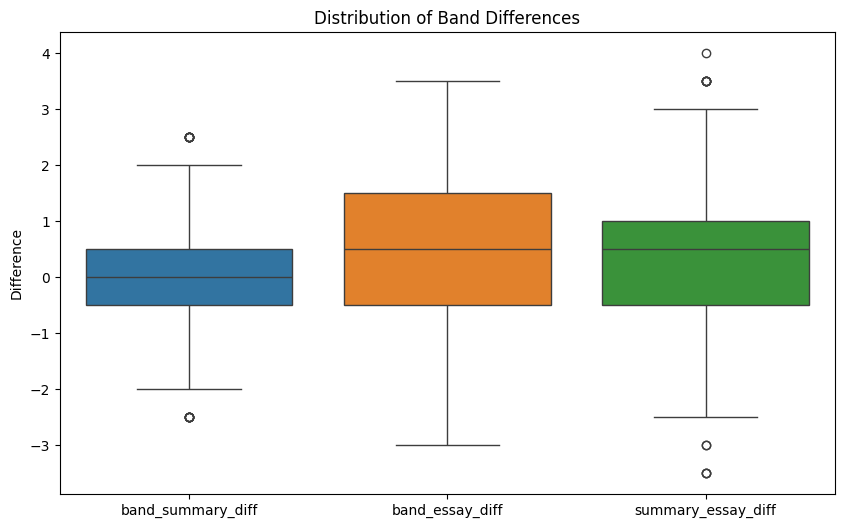

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['band_summary_diff', 'band_essay_diff', 'summary_essay_diff']])
plt.title('Distribution of Band Differences')
plt.ylabel('Difference')
plt.show()


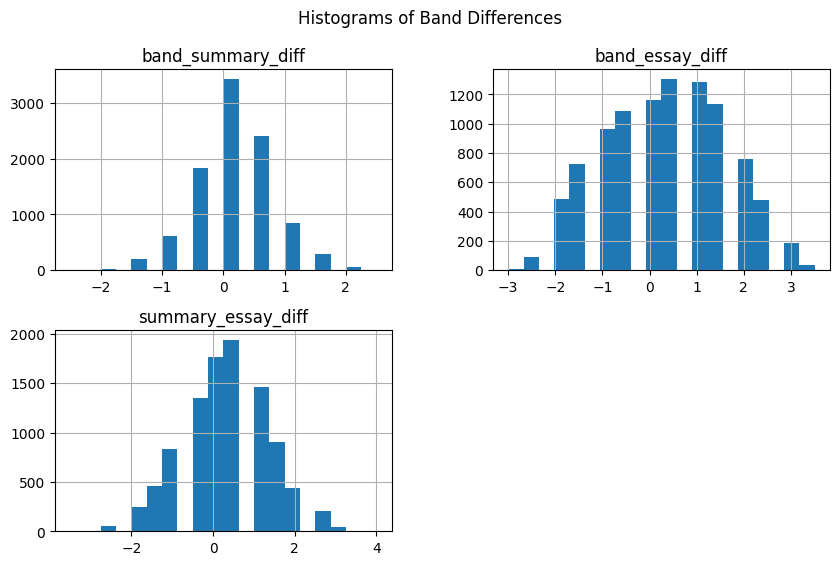

In [ ]:
# Create histograms for the differences
df[['band_summary_diff', 'band_essay_diff', 'summary_essay_diff']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Band Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


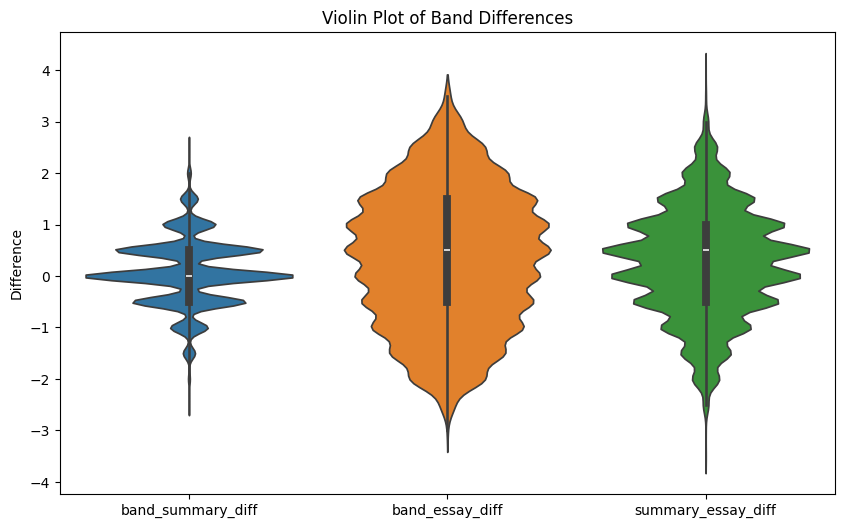

In [ ]:
# Create a violin plot for the differences
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['band_summary_diff', 'band_essay_diff', 'summary_essay_diff']])
plt.title('Violin Plot of Band Differences')
plt.ylabel('Difference')
plt.show()
